# The goal of this notebook is to calculate the trajectory of the star hd_163466 in sky
-------------------------------------------------------------------------------------------------------------

- At a particular location on earth : Flagstaff Observatory
- At a particular date  : May 2016 (Monocam run)

Adapted from astropy examples.

- Author : Sylvie Dagoret-Campagne
- date creation : 25 june 2016



## Import relevant packages

In [1]:
import urllib
import IPython.display
import numpy as np
import astropy

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [7]:
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

## The observatory site

This star has been observed by the Monocam/LSST program.

- HD158485
- HD163466

The observatory site is Flagstaff NOFS :

| Organization 	| United States Naval Observatory |

|Code 	| 689|


Location 	Coconino County, near Flagstaff, Arizona

Coordinates 	35°11′03″N 111°44′25″W

Altitude 	2,273 metres (7,457 ft)


Website 	http://www.nofs.navy.mil/

Telescopes:
- Kaj Strand Telescope 	1.55 m (61 in) reflector
- DFM/Kodak/Corning 	**1.3 m reflector**
- Unnamed telescope 	1.0 m (40 in) Ritchey-Chretien reflector
- Flagstaff Astrometric Scanning Transit Telescope 	8-inch (20 cm) catadioptric
- Navy Precision Optical Interferometer 	interferometer (Located at Anderson Mesa)

## The telescope
Telescope Data

    Construction
        Optics: Corning Glass Works (blanks); Kodak (optical figuring)
        Mounting: DFM Engineering, Inc.
        Date Completed: 1998
        Cost: $800,000 
    Optical Design: Modified Ritchey-Chretien
    Effective Focal Length: 5.2-meters
    Overall Focal Ratio: f/4
    Focal Plane Scale: 39.6 arcsec/mm
    Primary Mirror
        Diameter: 1.3-meters (51-inches)
        Material: Ultra-Low-Expansion (ULE) Glass
        Weight:
        Figure: Concave Hyperboloid
        Focal Ratio: f/2.4 
    Secondary Mirror
        Diameter: 0.61-meter (24-inches)
        Material: ULE Glass
        Weight:
        Figure: Convex Hyperboloid 
    Total Weight (Optics, Tube and Mount): 

## The Camera : Monocam

# Find the earth location of the observatory of interest 

In [37]:
# tow view all the list of pre-defined observatory, uncomment the following lines
#import astropy
#astropy.coordinates.EarthLocation.get_site_names()

- I can't see this observatory in that list, but I can see LSST obervatory at Cerro Pachon.
then just be example, get the true location of a site as follow:

In [38]:
LSST_site='Cerro Pachon'
lsst_geo_coord=astropy.coordinates.EarthLocation.of_site(LSST_site).to_geodetic()

In [39]:
lsst_geo_coord

(<Longitude -70.7366833333333 deg>,
 <Latitude -30.240741666666672 deg>,
 <Quantity 2749.999999999238 m>)

- Seriously now, the location of NOFS is not in astropy list. Thus I enter the coordinates by hands form the
wikipedia information:

- https://en.wikipedia.org/wiki/United_States_Naval_Observatory_Flagstaff_Station


In [40]:
#Flagstaff_NOFS location
NOFS_Longitude=Angle(u'-111°44′25″')  # longitudes from -180° (West) to 180° (East)
NOFS_Latitude=Angle(u'35°11′03″')     # latitudes from -90° (West) to 90° (East)

In [41]:
from astropy.coordinates import Longitude, Latitude

In [42]:
NOFS_Longitude=Longitude(u'-111°44′25″') 
NOFS_Latitude=Latitude(u'35°11′03″')
NOFS_Height=2.273*u.m 

In [43]:
#definition of the location to astropy
NOFS_location = astropy.coordinates.EarthLocation(lat=NOFS_Latitude, lon=NOFS_Longitude, height=NOFS_Height)

## Now the time

The timzone for Flagstaff Arizona is US mountain timezone is 

- **MDT 	Mountain Daylight Time (North America) 	UTC−06**


- 7 hours diff in winter wrt UTC
- 6 hours diff in summer wrt UTC

- 'US/Mountain'
- 'US/Arizona'

### Exemple of working with time

The goal is to understand what is the exact time offset of the the observation wrt UTC.
For this, we use Time libraries for different package to convince that in May, the Time Offset of
the Arizona is 6 hours late.

Note that in summer the UTC offset of France is + 2 hours.
Then in France we have a delay of + 8 hours wrt Arizona, +9 Hours wrt California and + 6 hours wrt US/Eastern.


The package pytz helps in defining the timezone
The package pandas (pd) helps in calculating the time difference between two timezones including Day Saving Time (DST)
offset.

UTC Offsets are not the same in summers and in winters.

In [44]:
# to view all the defined timezone inside the pytz library
# uncomment the following lines
#import pytz
#pytz.all_timezones

In [45]:
# define an UTC timezone
tz_utc = pytz.utc
tz_utc.zone

'UTC'

In [46]:
# define the US-Moutain timzone
# Arizona is in the US-Mountain (MDT) timezone ou MST
tz_mountain = timezone('US/Mountain')
tz_mountain.zone

'US/Mountain'

In [47]:
# define a timestamp in Flagstaff at legal local time (watch time)
# pandas library is used because it takes into account UTC offset and DST offset
stamp_flagstaff=pd.Timestamp('2016-01-11 23:59',tz=tz_mountain) 

In [48]:
# gives the equivalent time in UTC  # see a 6 hours shift wrt UTC in summer and 7 hours in winter
# Check the reverse operation 
stamp_flagstaff.tz_convert('UTC') 

Timestamp('2016-01-12 06:59:00+0000', tz='UTC')

In [49]:
# Convert the hour shift is really 6 hours in summer and 7 hours in winter
stamp_utc=pd.Timestamp('2016-01-12 00:00',tz='utc')

In [50]:
stamp_utc.tz_convert('US/Mountain')

Timestamp('2016-01-11 17:00:00-0700', tz='US/Mountain')

In [51]:
# UTC with astropy time library
utc = astropy.time.TimezoneInfo()    # Defaults to UTC
utc_minus_six_hours = TimezoneInfo(utc_offset=-6*u.hour)  # UTC-6

In [52]:
utc_minus_six_hours

## Defines the astronomical objects to observe

- astropy is connected to strasbourg CDS center to retrieve the coordinate of the astronomical object 

In [53]:
hd_158485_starloc=astropy.coordinates.SkyCoord.from_name('HD158485')

In [54]:
hd_158485_starloc

<SkyCoord (ICRS): (ra, dec) in deg
    (261.52015235, 58.65189569)>

In [55]:
hd_163466_starloc=astropy.coordinates.SkyCoord.from_name('HD163466')

In [56]:
hd_163466_starloc

<SkyCoord (ICRS): (ra, dec) in deg
    (268.10572628, 60.39637404)>

## Plots the trajectory on local sky coordinates

- I use the example from astropy given here
http://docs.astropy.org/en/latest/generated/examples/coordinates/plot_obs-planning.html#sphx-glr-generated-examples-coordinates-plot-obs-planning-py

In [57]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [58]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

### UTC offset for Flagstaff:
---------------------------
http://www.timeanddate.com/time/zone/usa/flagstaff

MST : UTC-7


In [59]:
utcoffset=utcoffset = -7*u.hour  # Mountain Daylight Time in summer is -6 , however it was not followed this year
                                 # You must enter this info here
midnight = Time('2016-5-12 00:00:00') - utcoffset  # compute local midnight in UTC night 11/05 to 12/05
delta_midnight = np.linspace(-2, 10, 100)*u.hour   # variation around midnight in UTC
frame_May11night = AltAz(obstime=midnight+delta_midnight,
                          location=NOFS_location) # local equatorial- time frame
hd_163466_altazs_May11night = hd_163466_starloc.transform_to(frame_May11night) # star coordinayr projected on the local frame

If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]
If you need enough precision such that this matters (~<10 arcsec), you can
use the latest IERS predictions by running:

    >>> from astropy.utils import iers
    >>> iers.IERS.iers_table = iers.IERS_A.open(iers.IERS_A_URL)

 [astropy.coordinates.builtin_frames.utils]


### Plot the altitude versus time

In [60]:
hd_163466_May11night_alt=hd_163466_altazs_May11night.alt # extract the altitude

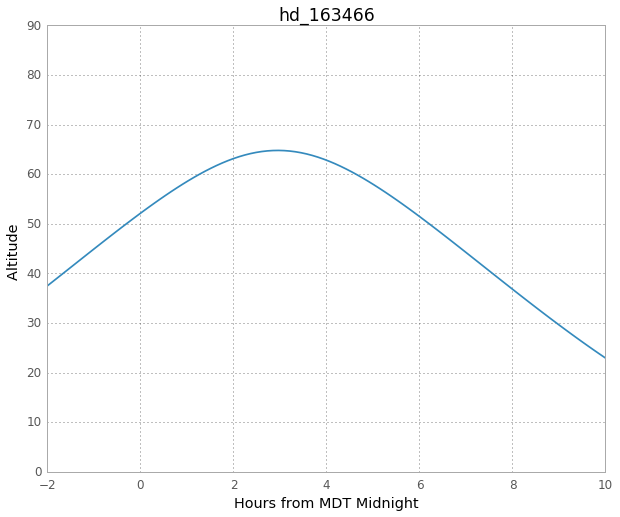

In [61]:
plt.figure(figsize=(10.,8.))
plt.plot(delta_midnight, hd_163466_May11night_alt)
plt.xlim(-2, 10)
plt.ylim(0, 90)
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Altitude ')
plt.title('hd_163466')
plt.show()

### Plot the airmass versus the time

In [62]:
hd_163466_May11night_am = hd_163466_altazs_May11night.secz

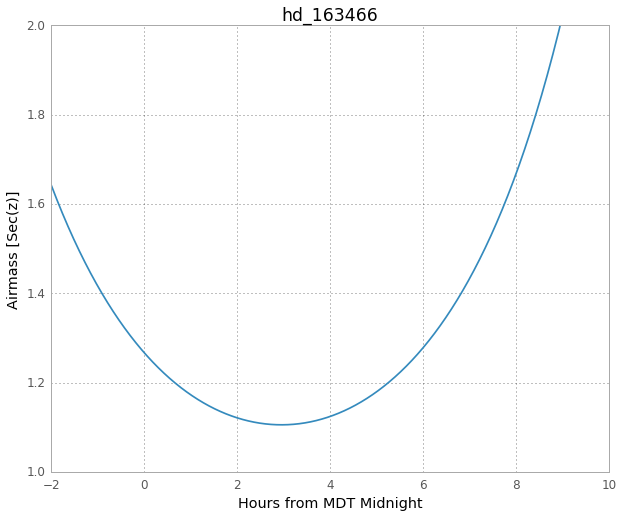

In [63]:
plt.figure(figsize=(10.,8.))
plt.plot(delta_midnight, hd_163466_May11night_am)
plt.xlim(-2, 10)
plt.ylim(1, 2)
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Airmass [Sec(z)]')
plt.title('hd_163466')
plt.show()

### Shows also  the sun location, the dark astronomical night and the astronomical twilight

In [64]:
from astropy.coordinates import get_sun
utcoffset=utcoffset = -6*u.hour  # Mountain  Daylight Time
midnight = Time('2016-5-12 00:00:00') - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times_May11_to_12 = midnight + delta_midnight
frame_May11_to_12 = AltAz(obstime=times_May11_to_12, location=NOFS_location)
sunaltazs_May11_to_12 = get_sun(times_May11_to_12).transform_to(frame_May11_to_12)

- Find the alt,az coordinates of hd_163466 at those same times:

In [65]:
 hd_163466_altazs_May11_to_12 = hd_163466_starloc.transform_to(frame_May11_to_12 )

Make a beautiful figure illustrating nighttime and the altitudes of hd_163466 and the Sun over that time:

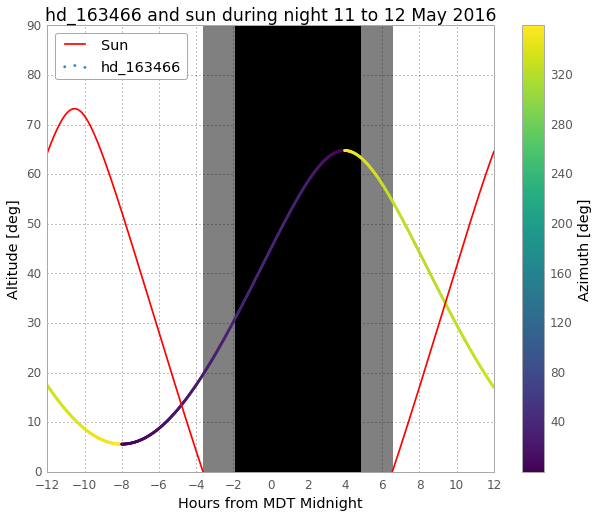

In [66]:
plt.figure(figsize=(10.,8.))
plt.plot(delta_midnight, sunaltazs_May11_to_12.alt, color='r', label='Sun')
plt.scatter(delta_midnight, hd_163466_altazs_May11_to_12.alt,
            c=hd_163466_altazs_May11_to_12.az, label='hd_163466', lw=0, s=8,
            cmap='viridis')

# plot astronomical crepuscule
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_May11_to_12.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_May11_to_12.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.title('hd_163466 and sun during night 11 to 12 May 2016')
plt.xlabel('Hours from MDT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()
